<a href="https://colab.research.google.com/github/Mytros/DS_ML_homework/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_Dmytro_Koval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
medical_df = pd.read_csv('drive/MyDrive/DS_ML/medical-charges.csv')

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Ідеї:

1. Порівняти середні значення
Подивитись, як змінюється середнє значення charges у різних груп:

- Курці проти некурців.

- Чоловіки проти жінок.

- У різних регіонах.

2. Подивитись, як впливає вік, та кількість дітей.
Чи збільшується вартість (charges), коли:

- людина старша (age)

- має вищий індекс маси тіла (bmi)

- має більше дітей (children)

3. Побудова візуалізацій (+ можливо подивитися середні значення для кожної з груп)

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
?px.histogram

In [ ]:
def plot_charges_distribution(df, group_col, title):
    fig = px.histogram(df,
                       x='charges',
                       color=group_col,
                       marginal='box',
                       color_discrete_sequence=px.colors.qualitative.T10,
                       title=title)
    fig.update_layout(bargap=0.1)
    fig.show()

In [ ]:
plot_charges_distribution(medical_df, 'sex', 'Medical Charges by Sex')
plot_charges_distribution(medical_df, 'region', 'Medical Charges by Region')


Спостереження:

1. Sex:

Обидві статі мають схожий загальний розподіл — більшість витрат сконцентрована до 20,000.

Boxplot зверху показує, що:

- у чоловіків трохи вище медіана та більша варіативність.

- у жінок менше викидів зі значеннями понад 50,000.

- У чоловіків більше екстремальних значень — тобто, є група, яка сплачує значно більше.

Висновок:
Стать має незначний, але помітний вплив на charges, особливо на верхньому хвості (великі витрати).

2. Region:

- Найбільша частина записів припадає на регіони southeast і northeast.

- Регіон southeast має найбільше високих значень (charges > 40,000).

- У southwest та northwest — розподіли більш “плоскі”, з меншими максимумами.

- Boxplot демонструє схожі медіани, але в southeast — довгий правий хвіст.

Висновок:

Регіон може впливати на медичні збори, імовірно через регіональні особливості тарифів або стану здоровʼя населення в певному регіоні (екологічні фактори).

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
def plot_distribution_by_smoker(df, column, title='None'):
    fig = px.histogram(df,
                       x=column,
                       color='smoker',
                       barmode='group',
                       text_auto=True,
                       title=title)
    fig.update_layout(bargap=0.1)
    fig.show()


In [ ]:
plot_distribution_by_smoker(medical_df, 'region', 'Smokers in Regions Distribution')
plot_distribution_by_smoker(medical_df, 'children', 'Smokers in Children Distribution')


1. Розподіл курців за регіонами (region)

Спостереження:

- У кожному регіоні некурців суттєво більше, ніж курців.

- Найбільше курців у southeast — 91 особа, це найвища частка серед усіх регіонів.

- Найменше курців у southwest і northwest — по 58 осіб.

- Рівномірність серед некурців по всіх регіонах майже однакова (≈ 260–270 осіб).

Висновок:
Регіон "southeast" має найбільшу кількість курців, тому може бути зоною підвищеного ризику для медичних витрат.

2. Розподіл курців за кількістю дітей (children)
Спостереження:

- Найбільше курців серед тих, хто не має дітей — 115 осіб.

- Зі збільшенням кількості дітей, кількість курців зменшується.


Висновок:

Курці переважно не мають дітей або мають 1–2 дитини. Імовірно, батьківство пов’язане зі зниженням ймовірності куріння.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
?px.violin

In [ ]:
fig = px.violin(medical_df,
                x='children',
                y='charges',
                color = 'smoker',
                points='all',
                box=True,
                title='Smokers and children')
fig.show()

Висновок:

- Фактор "куріння" — основна причина високих медичних витрат, а не кількість дітей.

- Кількість дітей практично не впливає на charges, або цей вплив дуже слабкий.


**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

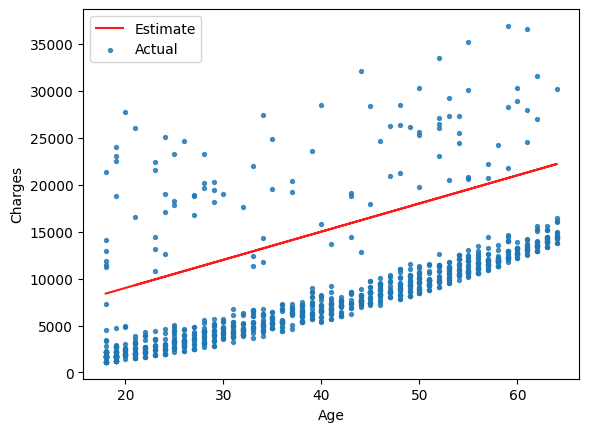

In [ ]:
try_parameters(non_smoker_df, 300, 3000)

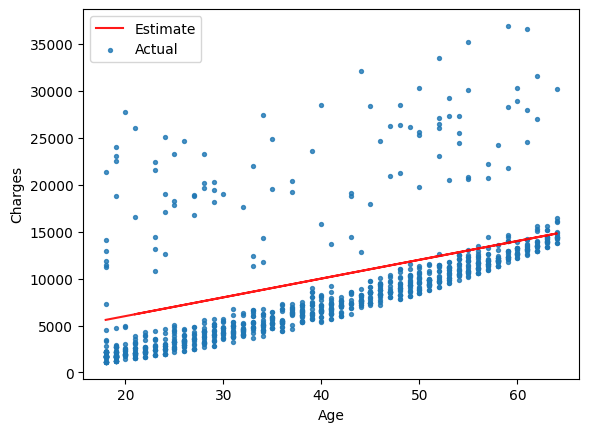

In [ ]:
try_parameters(non_smoker_df, 200, 2000)

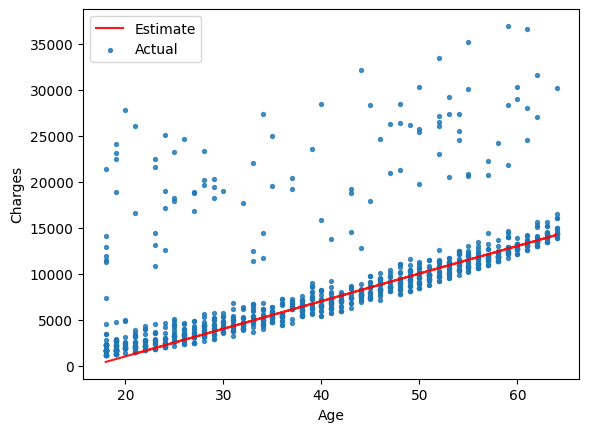

In [ ]:
try_parameters(non_smoker_df, 300, -5000)

Спостереження:

Лінійна модель типу charges = w × age + b не може повністю охопити всю варіативність медичних витрат, але може дати уявлення про загальний тренд зростання витрат із віком, якщо правильно підібрати w та b.
При цьому важливо усвідомлювати вплив викидів, які можуть зміщувати лінію і робити модель менш придатною для середнього користувача.

+ з віком ростуть і витрати на страхування.


**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    # plot
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual'])
    plt.title(f'w = {w}, b = {b}')

    # RMSE  NumPy
    loss = np.sqrt(np.mean(np.square(target - predictions)))
    print("RMSE Loss:", round(loss, 2))

RMSE Loss: 7916.62


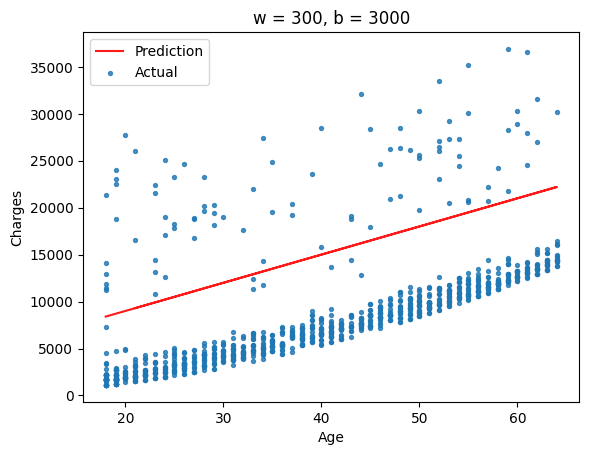

In [ ]:
try_parameters(300, 3000)

RMSE Loss: 4971.6


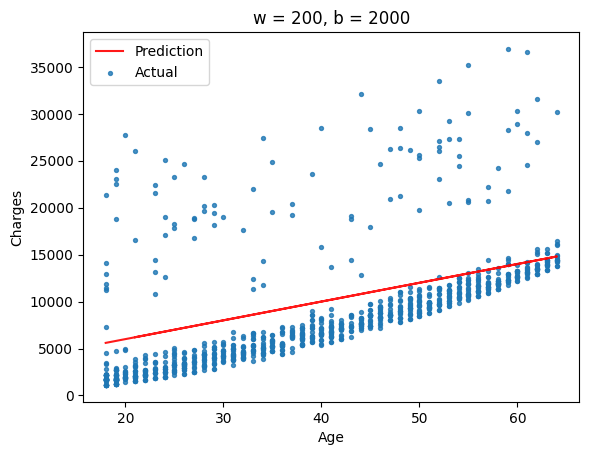

In [ ]:
try_parameters(200, 2000)

RMSE Loss: 4956.97


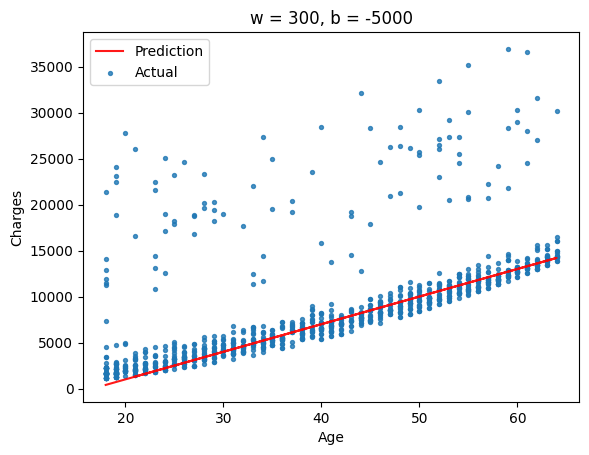

In [ ]:
try_parameters(300, -5000)

Висновок:

- Серед трьох протестованих моделей найнижчу похибку показала пара параметрів (300, -5000), з RMSE ≈ 4956.97. Вона найкраще підлаштовується під дані, охоплює випадки з високими медичними витратами в старшому віці.

- Проте, модель з параметрами (200, 2000) показала дуже подібну точність. RMSE ≈ 4971.60, що лише незначно гірше. Водночас ця модель має більш помірний нахил і краще описує типову частину даних, не надто чутлива до викидів.

- Просто підставляти дані - виглядає дивним заннятям, але треба спробувати попасти всередину найщільнішого сукупчення данних, де w - "нахил" прямої, а b - зміщення по осі oy.